In [1]:
from matplotlib import pyplot as plt
import numpy as np 
import pandas as pd
import yfinance as yf
from datetime import datetime as dt
from scipy.optimize import minimize, Bounds
import warnings
warnings.filterwarnings('ignore')

In [2]:
def period(df,start,end):
    start = dt.strptime(start, '%d-%m-%Y')
    end = dt.strptime(end, '%d-%m-%Y')
    mask = (df.index >= start) & (df.index <= end)
    return df.loc[mask]


In [3]:
#import data for Microsoft
ticker = "MSFT"
df = yf.Ticker(ticker)
price = df.history(period="max")['Close']
returns = -np.log(price).diff()
returns.dropna(inplace=True)

In [4]:
start = "26-11-2011"
end = "26-11-2016"

returns =  period(returns,start,end)

In [5]:
def e(v): return sum((np.maximum(list(returns-v),[0]*len(returns))))/sum(returns>v) 

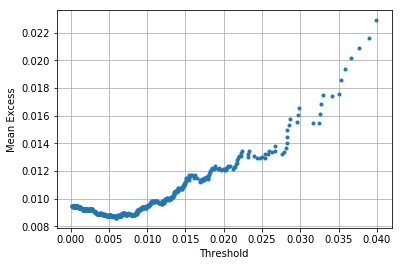

In [6]:
res = returns[(returns > 0) & (returns < 0.04)]
plt.plot(res,[e(r) for r in res],'.')
plt.grid()
plt.xlabel('Threshold')
plt.ylabel('Mean Excess')
plt.show()

In [7]:
def l(X,u,returns):
    eps = X[0]
    beta = X[1]
    xi = (returns - u)
    xi = xi[xi > 0]
    return -sum(np.log((1+eps*xi/beta)**(-1-1/eps)/beta))

In [8]:
u = 0.01
X0 = [0.1,0.001]
bound = Bounds([1e-12,1e-12], [np.inf,np.inf], keep_feasible=True)
result = minimize(l,x0 = X0,args = (u,returns),bounds = bound)
print('The estimates are: ',result.x)

The estimates are:  [0.21886311 0.00735514]
